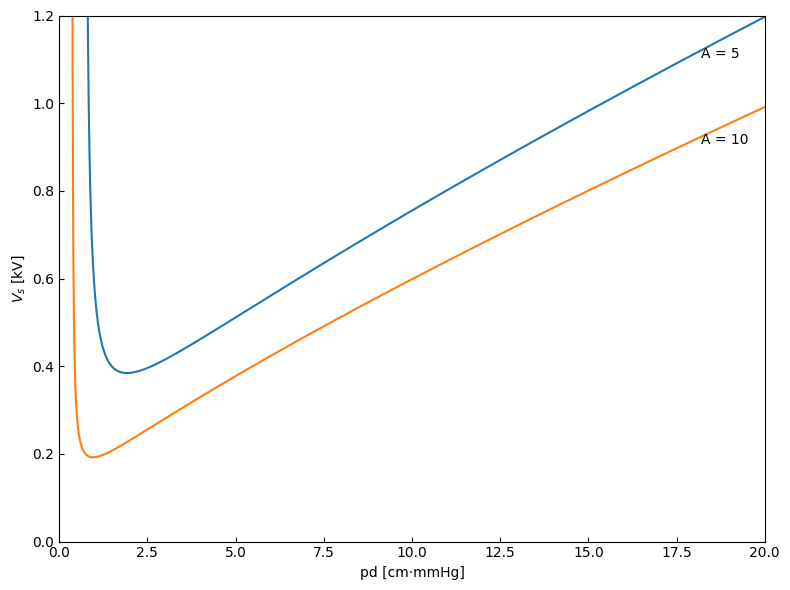

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定数
B = 200               # V/(cm·mmHg)
gamma = 0.03
A_list = [5, 10]      # 1/(cm·mmHg)

# pd の範囲（0 に近いと分母が 0 になるので、極端に小さい値は避ける）
pd = np.linspace(0.1, 20, 1000)

# 放電電圧の計算関数
def paschen_voltage(pd, A, B, gamma):
    denom = np.log(A * pd) - np.log(np.log(1 + 1/gamma))
    Vs = B * pd / denom
    Vs[denom <= 0] = np.nan  # 分母 ≤ 0 の領域は除外
    return Vs

plt.figure(figsize=(8, 6))

for A in A_list:
    Vs = paschen_voltage(pd, A, B, gamma)
    Vs_kV = Vs / 1000  # V → kV に変換
    line, = plt.plot(pd, Vs_kV)
    # 曲線の終点付近にラベルを配置
    x_text = 18
    y_text = np.interp(x_text, pd, Vs_kV)
    plt.text(x_text + 0.2, y_text, f"A = {A}", va='center')


plt.xlabel("pd [cm·mmHg]")
plt.ylabel("$V_s$ [kV]")
plt.xlim(0, 20)
plt.ylim(0, 1.2)

# 補助目盛を非表示
plt.minorticks_off()
# 目盛り線をすべて内向きに
plt.tick_params(direction='in', which='both')
plt.tight_layout()
plt.savefig("paschen_curve.pdf")
plt.show()
